In [1]:
# A sentiment analysis job about the problems of each major U.S. airline. 
# Twitter data was scraped from February of 2015 and contributors were asked to first classify 
# positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Read the file data.csv. The enconding is important for the @ in the column text
# Show the first few records
path = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/'
data = pd.read_csv(path + "Tweets.csv", encoding="ISO-8859-1")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Show the general information about the data
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
# Give the dimensions of the data
data.shape

(14640, 15)

In [ ]:
# Give for each column the number of values available
data.count()

tweet_id                        14640
airline_sentiment               14640
airline_sentiment_confidence    14640
negativereason                   9178
negativereason_confidence       10522
airline                         14640
airline_sentiment_gold             40
name                            14640
negativereason_gold                32
retweet_count                   14640
text                            14640
tweet_coord                      1019
tweet_created                   14640
tweet_location                   9907
user_timezone                    9820
dtype: int64

In [ ]:
# Drop the columns airline_sentiment_gold, negativereason_gold, tweet_coord, tweet_location, user_timezone
data = data.drop(["airline_sentiment_gold", "negativereason_gold", "tweet_coord", "tweet_location", "user_timezone"], axis = 1)

In [ ]:
# Give for each column the number of values available
data.count()

tweet_id                        14640
airline_sentiment               14640
airline_sentiment_confidence    14640
negativereason                   9178
negativereason_confidence       10522
airline                         14640
name                            14640
retweet_count                   14640
text                            14640
tweet_created                   14640
dtype: int64

In [ ]:
# Give the datatype of each column
data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
name                             object
retweet_count                     int64
text                             object
tweet_created                    object
dtype: object

In [ ]:
# Which are the different airlines in the dataset? 
data["airline"].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [ ]:
# Give the number of tweets per airline, sort descending
data.groupby('airline')['tweet_id'].count().sort_values(ascending=False)

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: tweet_id, dtype: int64

In [ ]:
# Give a pivot table with the number of positive, neutral and negative tweets per airline (airlines in alphabetical order) 
# Method 1
data.groupby(['airline', 'airline_sentiment'])['tweet_id'].count().unstack().sort_values(by=['airline']).fillna(0)

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [ ]:
# Give a pivot table with the number of positive, neutral and negative tweets per airline (airlines in alphabetical order) 
# Method 2
pd.pivot_table(data, values='tweet_id', index='airline',columns='airline_sentiment',aggfunc=np.count_nonzero).fillna(0)

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [ ]:
# Give the name of the 10 biggest complainers
data[data['airline_sentiment'] == 'negative'].groupby('name')['tweet_id'].count().sort_values(ascending = False).head(10)

name
otisday            28
_mhertz            27
throthra           24
rossj987           23
weezerandburnie    23
ElmiraBudMan       18
scoobydoo9749      18
ThatJasonEaton     18
GREATNESSEOA       18
chagaga2013        18
Name: tweet_id, dtype: int64

In [ ]:
# Transform the date of tweet_created to_datetime
data['tweet_created'] = pd.to_datetime(data['tweet_created'])
data.dtypes

tweet_id                                                         int64
airline_sentiment                                               object
airline_sentiment_confidence                                   float64
negativereason                                                  object
negativereason_confidence                                      float64
airline                                                         object
name                                                            object
retweet_count                                                    int64
text                                                            object
tweet_created                   datetime64[ns, pytz.FixedOffset(-480)]
dtype: object

In [ ]:
# What is the minimum date?
data['tweet_created'].min()

'2015-02-16 23:36:05 -0800'

In [ ]:
# What is the maximum date?
data['tweet_created'].max()

'2015-02-24 11:53:37 -0800'

In [ ]:
# Remove the (english) stopwords from the text + Remove the words that start with @ from the text

import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import string
nltk.download('punkt')
    
def remove_stopwords_en(text):
    stop_words_en = set(stopwords.words('english')) 
    # turn the string into a list of words based on separators (blank, comma, etc.)
    word_tokens = word_tokenize(text.lower())
    # create a list of all words that are neither stopwords nor punctuations
    result = [x for x in word_tokens if x not in stop_words_en and not x.startswith('@')]
    
    # create a new string of all remaining words
    seperator = ' '
    return seperator.join(result)

data['text'] = data['text'].map(remove_stopwords_en)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data['text'].head()

0                        virginamerica dhepburn said .
1    virginamerica plus 've added commercials exper...
2    virginamerica n't today ... must mean need tak...
3    virginamerica 's really aggressive blast obnox...
4                virginamerica 's really big bad thing
Name: text, dtype: object

In [ ]:
# We are going to try to predict the airline_sentiment
# Create a new dataframe dataRF that contains the necessary columns to do this
# We are only going to use those tweets with airline_sentiment_confidence >= 0.5
dataRF = data[data['airline_sentiment_confidence'] >= 0.5][['airline_sentiment', 'text']]
dataRF.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn said .
2,neutral,virginamerica n't today ... must mean need tak...
3,negative,virginamerica 's really aggressive blast obnox...
4,negative,virginamerica 's really big bad thing
5,negative,virginamerica seriously would pay $ 30 flight ...


In [ ]:
# How many records are left?
dataRF.shape

(14404, 2)

In [ ]:
# What are the unique values for airline_sentiment?
data["airline_sentiment"].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [ ]:
# Replace the airline_sentiment negative by 0, neutral by 1 and positive by 2
def transform(s):
  sentiments = {'negative': 0, 'neutral': 1, 'positive': 2}
  return sentiments[s]

dataRF['airline_sentiment'] = dataRF['airline_sentiment'].map(transform)
dataRF.head()

,airline_sentiment,text
0,1,virginamerica dhepburn said .
2,1,virginamerica n't today ... must mean need tak...
3,0,virginamerica 's really aggressive blast obnox...
4,0,virginamerica 's really big bad thing
5,0,virginamerica seriously would pay $ 30 flight ...


In [ ]:
# Create X and y

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

# fix random seed for reproducibility
seed = 2020
np.random.seed(seed)  

import sklearn as sk
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, Conv1D,  MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import load_model


import nltk


2.3.0


In [ ]:
# helper functions for visualisation
# plotting the loss functions used in this notebook
# we plot the loss we want to optimise on the left (in this case: accuracy)
def plot_history(history):
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)

  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),'g-',
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),'r-',
           label = 'Validation accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Loss minimised by model')
  plt.plot(history.epoch, np.array(history.history['loss']),'g-',
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),'r-',
           label = 'Validation loss')
  plt.legend()

In [ ]:
# Average length of the messages
dataRF['numberOfWords'] = dataRF.text.str.split().apply(len)
dataRF.head()

,airline_sentiment,text,numberOfWords
0,1,virginamerica dhepburn said .,4
2,1,virginamerica n't today ... must mean need tak...,11
3,0,virginamerica 's really aggressive blast obnox...,17
4,0,virginamerica 's really big bad thing,6
5,0,virginamerica seriously would pay $ 30 flight ...,17


In [ ]:
dataRF['numberOfWords'].describe()

count    14404.000000
mean        13.514996
std          5.241907
min          1.000000
25%         10.000000
50%         14.000000
75%         17.000000
max         39.000000
Name: numberOfWords, dtype: float64

In [ ]:
# Extract a training & validation split
from sklearn.model_selection import train_test_split
X = dataRF.drop(['airline_sentiment','numberOfWords'],axis=1)
y = dataRF['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(type(X_train))

X_train shape: (10082, 1)
X_test shape: (4322, 1)
10082 train samples
4322 test samples
<class 'pandas.core.frame.DataFrame'>


In [ ]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

print('X_train shape:', X_train.shape)
print(type(X_train))

X_train shape: (10082, 1)
<class 'numpy.ndarray'>


In [ ]:
# the labels from the downloaded data are integer numbers
# for a multi-class classification task, we again convert each integer
# to a vector with 19 zeros and a single '1', corresponding to the right class
num_classes = 3
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# look at the new labels for the first sample
print(y_train[0])
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

[1. 0. 0.]
y_train shape: (10082, 3)
y_test shape: (4322, 3)


In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=20)
text_ds = tf.data.Dataset.from_tensor_slices(X_train).batch(128)
vectorizer.adapt(text_ds)

In [ ]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [ ]:
test = ["i","saw","the", "cat", "sat", "on", "the", "mat"]
# [word_index[w] for w in test]
for w in test:
    try: 
        print(w + ': ' + str(word_index[w]))
    except KeyError:
        print (w+ " not available in word_index")


In [ ]:
path_to_glove_file = '/content/gdrive/My Drive/glove.6B.100d.txt'

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
num_tokens = len(voc) + 2
# each word is represented by a vector of 100 floats (glove.6B.100d.txt)
embedding_dim = 100
hits = 0
misses = 0
missed_words = []

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
# word_index is a dictionary that maps each word to an index
# we loop through all the words of word_index.items()
for word, i in word_index.items():
# we try to retrieve the vector of 100 floats for this word out of embeddings_index  
    embedding_vector = embeddings_index.get(word)
# if we found the corresponding vector of 100 floats    
    if embedding_vector is not None:
      # we put the vector on position i of embedding_matrix
        embedding_matrix[i] = embedding_vector
        hits += 1    
    else:
      # Words not found in embedding index will be all-zeros.    
        misses += 1
        missed_words.append(word)
        
print("Converted %d words (%d misses)" % (hits, misses))


Converted 8473 words (4643 misses)


In [ ]:
num_classes = 3

def initial_model():
    # we create a variable called model, and we set it equal to an instance of a Sequential object.
    model = Sequential()

    model.add(Embedding(num_tokens, embedding_dim, embeddings_initializer=keras.initializers.Constant(embedding_matrix),trainable=False))
    model.add(Conv1D(16,activation='relu',kernel_size=3))
    model.add(MaxPooling1D(3))
    model.add(Dropout(0.2)) 

    model.add(Conv1D(16,activation='relu',kernel_size=3))  
    model.add(Dropout(0.2)) 

    model.add(Conv1D(16,activation='relu',kernel_size=3))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))    
    model.add(Dropout(0.2))      
    model.add(Dense(num_classes, activation='softmax'))


    # Before we can train our model, we must compile it
    # To the compile() function, we are passing the optimizer, the loss function, and the metrics that we would like to see. 
    # Notice that the optimizer we have specified is called Adam. Adam is just a variant of SGD. 
    model.compile(loss='categorical_crossentropy',
                  optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001),
                  metrics=['accuracy']) 
    return model

In [ ]:
X_train_final = vectorizer(np.array([s for s in X_train])).numpy()
X_test_final = vectorizer(np.array([s for s in X_test])).numpy()

y_train_final = np.array(y_train)
y_test_final = np.array(y_test)

print(X_train.shape)
print(X_test.shape)
print(X_train_final.shape)
print(X_test_final.shape)
print(y_train_final.shape)
print(y_test_final.shape)

(10082, 1)
(4322, 1)
(10082, 20)
(4322, 20)
(10082, 3)
(4322, 3)


In [ ]:
model_1 = initial_model()
model_1.summary()


# We now add batch size to the mix of training parameters
# If you don't specify batch size below, all training data will be used for each learning step
batch_size = 128
epochs = 80

history_1 = model_1.fit(X_train_final, y_train_final,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_final, y_test_final)
                    )



Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 100)         1311800   
_________________________________________________________________
conv1d_36 (Conv1D)           (None, None, 16)          4816      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, None, 16)          0         
_________________________________________________________________
dropout_33 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, None, 16)          784       
_________________________________________________________________
dropout_34 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, None, 16)        

Training set Accuracy:   0.81
Training set Loss: 0.4879

Validation set Accuracy:   0.78
Validation set Loss: 0.5713



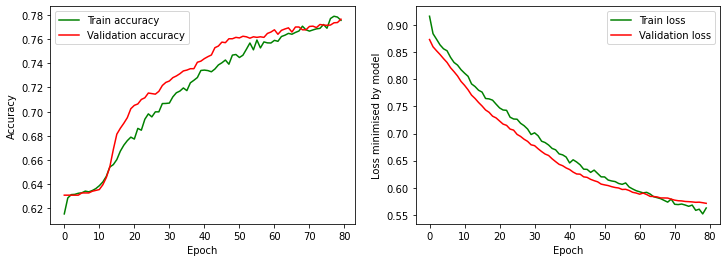

In [ ]:
# model_1 now contains the model at the end of the training run
# We analyse the result:

[train_loss, train_accuracy] = model_1.evaluate(X_train_final, y_train_final, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[val_loss, val_accuracy] = model_1.evaluate(X_test_final, y_test_final, verbose=0)
print("Validation set Accuracy:{:7.2f}".format(val_accuracy))
print("Validation set Loss:{:7.4f}\n".format(val_loss))

#Now we visualise what happened during training
plot_history(history_1)